In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

In [9]:
def loadDataFrame():
    weekly_cancellations = pd.read_csv("../Data/WeeklyCancellations.csv")
    weekly_cancellations["Full Date"] = pd.to_datetime(weekly_cancellations["Full Date"])

    return weekly_cancellations.set_index("Full Date", inplace=True)

In [10]:
# decompose time series into individual components
decomposition = seasonal_decompose(weekly_cancellations, period=52)

seasonal_component = decomposition.seasonal
trend_component = decomposition.trend
residual_component = decomposition.resid

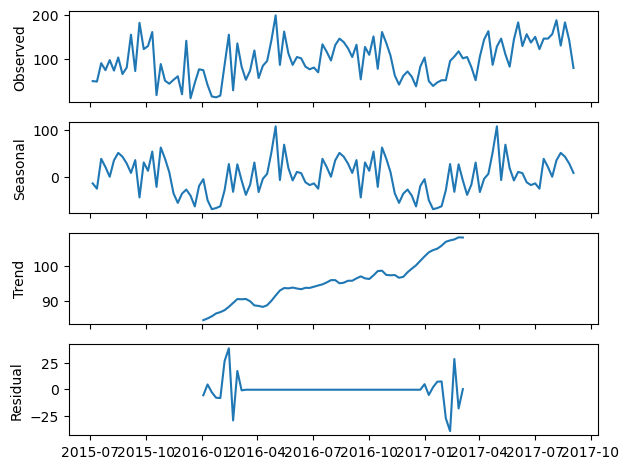

In [12]:
# plot individual components
def plot_components():
    fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True)
    
    axs[0].plot(decomposition.observed, label="Observed")
    axs[0].set_ylabel("Observed")
    
    axs[1].plot(seasonal_component, label="Seasonal")
    axs[1].set_ylabel("Seasonal")
    
    axs[2].plot(trend_component, label="Trend")
    axs[2].set_ylabel("Trend")
    
    axs[3].plot(residual_component, label="Residual")
    axs[3].set_ylabel("Residual")
    
    plt.tight_layout()
    
plot_components()

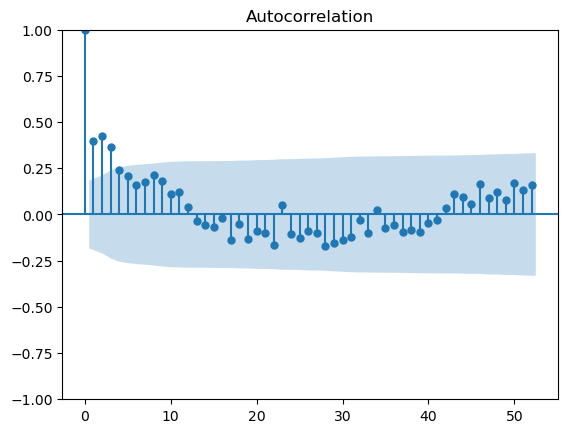

In [18]:
plot_acf(weekly_cancellations["IsCanceled"], lags=52)
plt.show()

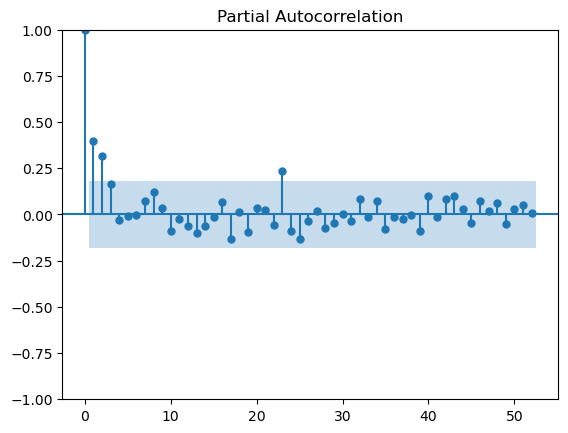

In [20]:
plot_pacf(weekly_cancellations["IsCanceled"], lags=52)
plt.show()

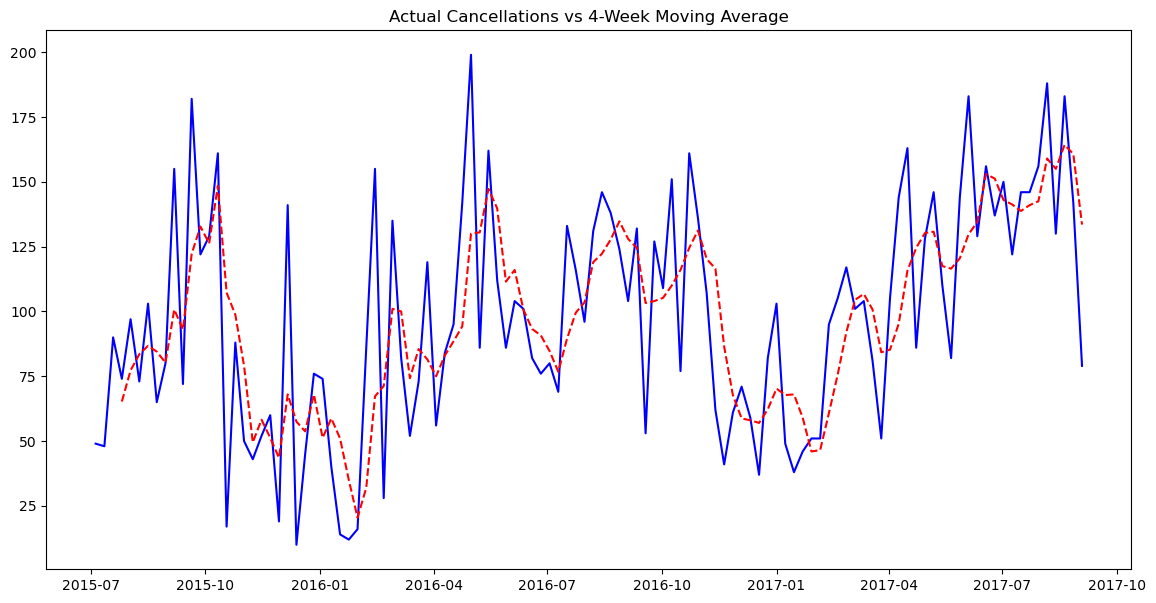

In [22]:
def plot_mavg_and_data():
    # get 4 week moving average
    mavg_4weeks = weekly_cancellations["IsCanceled"].rolling(window=4).mean()
    # plot moving average against series
    plt.figure(figsize=(14,7))
    plt.plot(weekly_cancellations["IsCanceled"], label="Actual Cancellations", color="blue")
    plt.plot(mavg_4weeks, label="4-Week Moving Average", color="red", linestyle="--")
    plt.title("Actual Cancellations vs 4-Week Moving Average")
    
plot_mavg_and_data()

In [26]:
def perform_train_test_split():
    input_data = weekly_cancellations.reset_index()
    X = input_data["Full Date"]
    y = input_data["IsCanceled"]
    
    return train_test_split(X, y, test_size=0.9, random_state=42)

x_train, x_test, y_train, y_test = perform_train_test_split()